In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

#convert to Dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species)
iris_df['species'] = iris.target

#mapping target numbers to species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.duplicated().sum()

np.int64(1)

In [ ]:
data = iris_df.drop_duplicates()


In [ ]:
X = data.drop(columns=["species"])  # drop targer variable

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

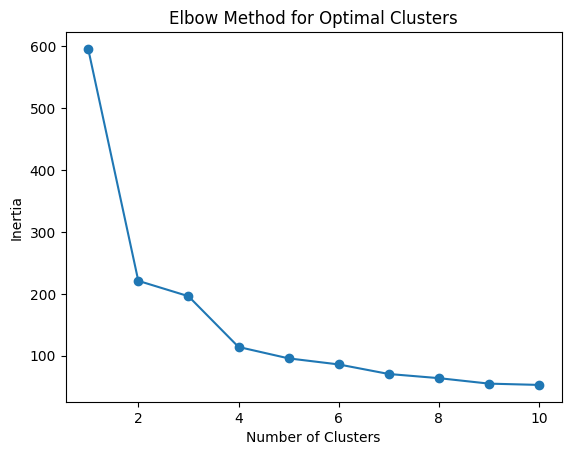

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

<ipython-input-68-b45ad3662355>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Cluster'] = clusters


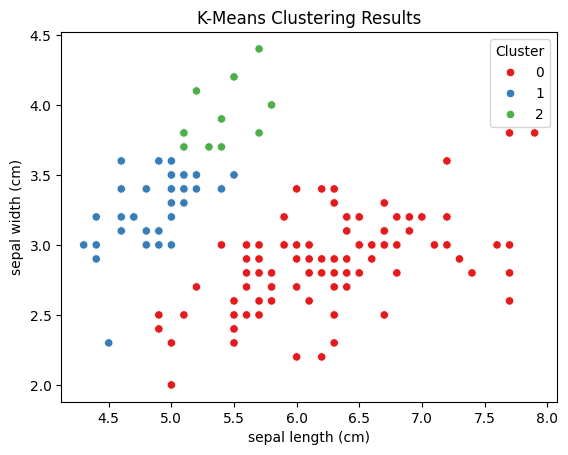

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data.loc[:, 'Cluster'] = clusters

# Now create the scatter plot with the correct column names
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Results')
plt.show()




    > Cluster Representation: The three clusters correspond to the natural grouping of the three Iris species: Iris-setosa, Iris-versicolor, and Iris-virginica.

    > Morphological Differences: Each cluster represents flowers with similar sepal and petal dimensions, highlighting their morphological differences.

    > Species Grouping: The clusters effectively group flowers based on their species-specific characteristics.


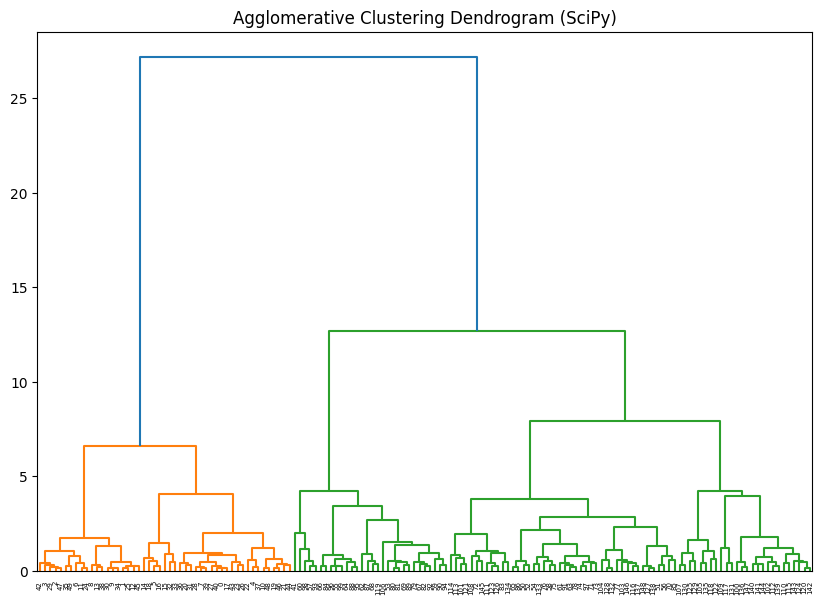

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Agglomerative Clustering Dendrogram (SciPy)')
plt.show()


<ipython-input-71-3a1b8e9ec7d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Agglomerative_Cluster'] = agg_clusters


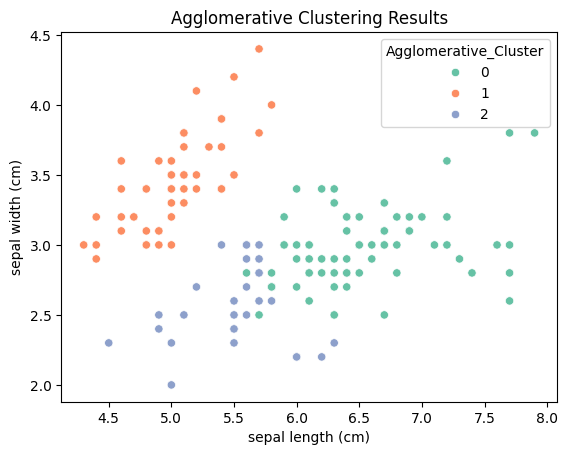

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
# Perform Agglomerative Clustering (without the 'affinity' argument)
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Add the cluster results to the data
data['Agglomerative_Cluster'] = agg_clusters

# Visualize the clusters
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='Agglomerative_Cluster', palette='Set2')
plt.title('Agglomerative Clustering Results')
plt.show()
